# Cat vs Dog Image Classifier with CNN

# 1 - Packages

Let's first import all the packages that I'll be using during this project.

* numpy is the main package for scientific computing with Python.
* pandas is a library for data manipulation and analysis.
* matplotlib is a library to plot graphs in Python.
* math contains some useful mathematical functions.
* train_test_split is used to split our training data into training, dev datasets.
* keras layers constitutes our cnn model 

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import math, os, cv2, random
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D, BatchNormalization

Using TensorFlow backend.


# 2 - Dataset

* I imported the fast.ai chapter 1 dataset.

In [21]:
TRAIN_DIR = '../input/train/'
TEST_DIR = '../input/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_orig_raw = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_orig_raw =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

train_raw = np.array(train_dogs[:5000] + train_cats[:5000])
random.shuffle(train_raw)
dev_raw = np.array(train_dogs[5000:5500] + train_cats[5000:5500])
random.shuffle(dev_raw)
test_raw = test_orig_raw[:500]

def labels(features):
    Y = []
    for i in features:
        if 'cat' in i:
            Y.append(1)
        else:
            Y.append(0)
    return np.array(Y)

Y_train = labels(train_raw)
Y_dev = labels(dev_raw)


# 3 - Data Pre-processiong

We need to pre-process our data before we can use it in our model and the code below does just that.

*I own a low spec laptop so I couldn't train my model on entire dataset so I used a small part of that dataset to train, test this model.*

In [22]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        data[i] = read_image(image_file)
    return data

X_train = prep_data(train_raw)
X_dev = prep_data(dev_raw)
X_test = prep_data(test_raw)
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))
print("X_dev shape: {}".format(X_dev.shape))
print("Y_dev shape: {}".format(Y_dev.shape))
print("Test shape: {}".format(X_test.shape))

X_train shape: (10000, 64, 64, 3)
Y_train shape: (10000,)
X_dev shape: (1000, 64, 64, 3)
Y_dev shape: (1000,)
Test shape: (500, 64, 64, 3)


# 4 - Visualization

Now we are going to check some pictures from our training data to see what do they actually contain. Here we plotted 5 pictures and their labels.

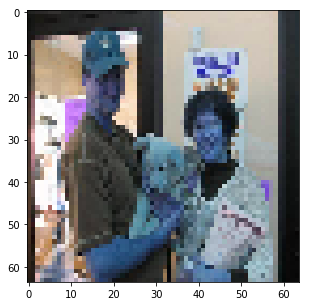

It's a dog.


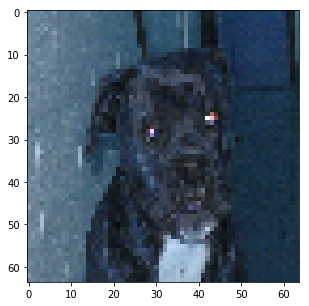

It's a dog.


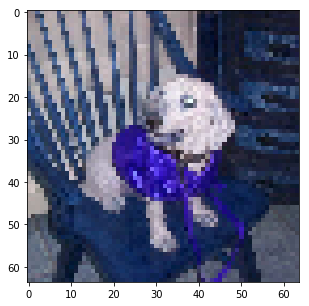

It's a dog.


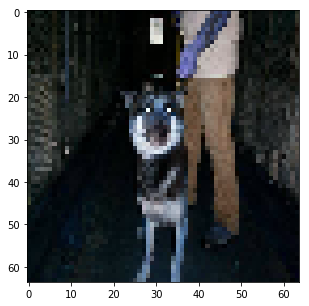

It's a dog.


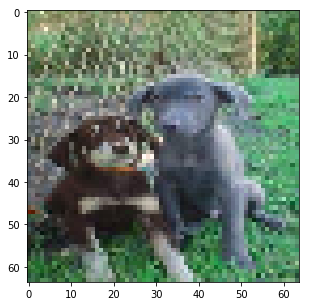

It's a dog.


In [3]:
def show_images(index):
    img = read_image(train_raw[index])
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()
    if Y_train[index] == 1:
        print("It's a cat.")
    else:
        print("It's a dog.")
    
for idx in range(0,5):
    show_images(idx * 100)


# 5 - Architecture of our model

Now that we are familiar with the dataset, it is time to build a deep neural network to distinguish between cats and dogs.

Here I used 3 convolutional layers and then 2 NN layers.

The optimizer I used here is Adam optimizer.

In [4]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3, 3))(X_input)
    
    X = Convolution2D(32, (7, 7), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)
    
    X = Convolution2D(64, (3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)
    
    X = Convolution2D(128, (3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)
    
    X = Flatten()(X)
    X = Dense(32, activation='relu')(X)
    X = Dense(1, activation='sigmoid')(X)
    
    model = Model(inputs=X_input, outputs=X)
    
    return model
model = model(X_train.shape[1:])
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

# 6 - Train the model
As our model is now ready we can start it's training.

Here I specified the number of iterations to 10

In [5]:
history = model.fit(X_train, Y_train, validation_split=0.3, epochs=10, batch_size=10)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 139s 20ms/step - loss: 0.7005 - acc: 0.6166 - val_loss: 0.6225 - val_acc: 0.6483
Epoch 2/10
7000/7000 [==============================] - 138s 20ms/step - loss: 0.5800 - acc: 0.6964 - val_loss: 0.8520 - val_acc: 0.5680
Epoch 3/10
7000/7000 [==============================] - 138s 20ms/step - loss: 0.5168 - acc: 0.7396 - val_loss: 0.7359 - val_acc: 0.6400
Epoch 4/10
7000/7000 [==============================] - 139s 20ms/step - loss: 0.4746 - acc: 0.7697 - val_loss: 0.6879 - val_acc: 0.6363
Epoch 5/10
7000/7000 [==============================] - 138s 20ms/step - loss: 0.4449 - acc: 0.7870 - val_loss: 0.5384 - val_acc: 0.7347
Epoch 6/10
7000/7000 [==============================] - 140s 20ms/step - loss: 0.4057 - acc: 0.8149 - val_loss: 0.5330 - val_acc: 0.7417
Epoch 7/10
7000/7000 [==============================] - 138s 20ms/step - loss: 0.3793 - acc: 0.8291 - val_loss: 0.5777 - val_acc: 

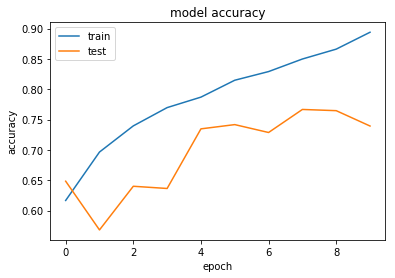

In [6]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The plot above shows how the training, testing accuracy varies with number of iterations.

# 7 - Make the predictions
Now that our model is trained, we can now see how well does our model do with,  test data.

In [16]:
Y_pred = model.predict(X_dev)
score = model.evaluate(X_dev, Y_dev, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.5648776454925537
Validation accuracy: 0.751


**Check the predections on the images in the test set**

As we haven't used the test set we got in our model until now. Now let's see how our model is working on these images.

Here I used the first 25 images in the test set for demonstration.

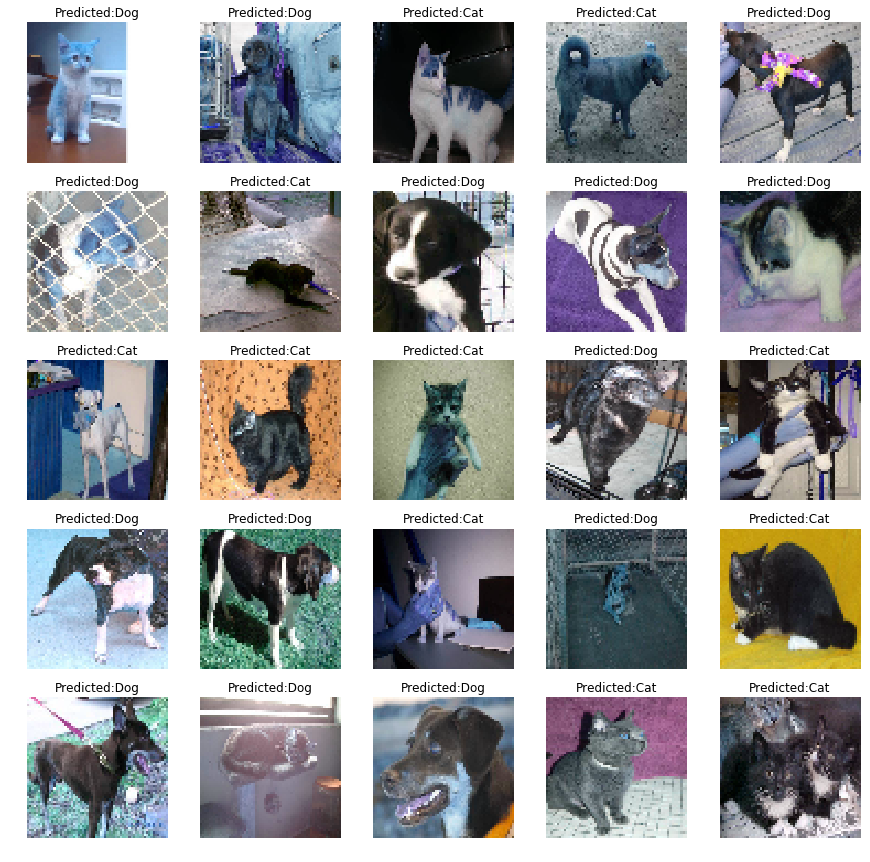

In [18]:
f, ax = plt.subplots(5,5, figsize=(15,15))
for i in range(0, 25):
    img = read_image(dev_raw[i])
    if Y_pred[i] >= 0.5 : 
        str_predicted='Cat'
    else: 
        str_predicted='Dog'
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(str_predicted))    
plt.show()

# Conclusion

* This notebooke shows how to import and use images which are stored in a .zip file.
* This notebook shows how to implement Convolutional Neural Network for image classification.